I spent a long time in summer 2014 working on a tool that would visualize a power network. Unfortunately, it got clunky and was ultimately not general enough to be truly useful.

Since then Julia's handling of graphs has improved. But by how much?

## Useful function
I have played with Graphs, GraphLayout, and GraphViz. The only useful function I have been able to write is in the following cell. Given an adjacency matrix (like an admittance matrix), it uses GraphLayout to compute a spring layout, then visualizes it. Visualization is done using Compose only, so no crazy dependencies. This function should always work so long I'm using the latest version of GraphLayout.

In [63]:
using GraphLayout

"""
Use GraphLayout.jl to compute a spring layout
for the graph corresponding to a provided
adjacency matrix. Returns Void; useful only
for quickly obtaining network graphs in an
interactive environment.
"""
function simple_graph_adj(adj,C=2.0)
    loc_x, loc_y = layout_spring_adj(adj,C=C)
    layout_tree
    labels = collect(1:size(adj,1))

    draw_layout_adj(adj,loc_x,loc_y,
    labels=labels,labelc="#000000",
    arrowlengthfrac=0.0,
    nodefillc="#FFFFFF",
    labelsize=2.0)
end

simple_graph_adj (generic function with 2 methods)

In [1]:
using GraphViz

  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:33
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:33
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:82
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:82
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:89
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:89
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:96
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:96
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:103
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:103
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:109
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:109
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:138
  likely near /home/jkersulis/.julia/v0.4/GraphViz/src/GraphViz.jl:138
  likely near 

In [2]:
include("../src/TemporalInstanton.jl")
using TemporalInstanton

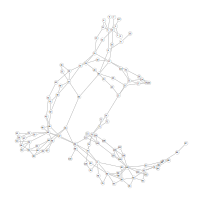

Void

In [58]:
i = mat2tmpinst("case118")
adj = full(i.Y)

simple_graph_adj(adj)

In [53]:
# line midpoints
coords = []
for i in find(adj)
    f,t = ind2sub(size(adj),i)
    push!(coords,[loc_x[f];loc_y[t]] + [loc_y[f];loc_y[t]]/2)
end
coords

## Playing with Graphs
Ultimately, I think Graphs is the most flexible package. It would be nice to programmatically generate `.dot` files complete with edge labels and such.

In fact, the [.dot file spec][1] is clearly the best choice. Unless D3 has some easy solution I just don't know about.

[1]: http://www.graphviz.org/doc/info/lang.html

In [22]:
a = Graph("""
graph graphname {
     // The label attribute can be used to change the label of a node
     a [label="Foo"];
     // Here, the node shape is changed.
     b [shape=box];
     // These edges both have different line properties
     a -- b -- c [color=blue];
     b -- d [style=dotted];
 }
""")

LoadError: LoadError: UndefVarError: Graph not defined
while loading In[22], in expression starting on line 1